# Bachelorarbeit - Evaluierung und Vergleich der Front-End Technologien Angular und React
## Andreas Kappel, BSWE, 2010859008

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

### Reading the input file and drop empty entries

In [3]:
log_data = pd.read_csv('log_api.csv')

In [4]:
log_data.dropna()

,browser,app,event,size,time
0,Chrome,Angular,domManipulation_BULK_REQUEST,3,0.700000
1,Chrome,Angular,domManipulation_BULK_REQUEST,3,0.600000
2,Chrome,Angular,domManipulation_BULK_REQUEST,3,0.700000
3,Chrome,Angular,domManipulation_BULK_REQUEST,3,0.700000
4,Chrome,Angular,domManipulation_BULK_REQUEST,3,0.600000
...,...,...,...,...,...
11995,Firefox,React,domManipulation_SINGLE_REQUESTS,300,3844.328406
11996,Firefox,React,domManipulation_SINGLE_REQUESTS,300,3617.381247
11997,Firefox,React,domManipulation_SINGLE_REQUESTS,300,3679.612386
11998,Firefox,React,domManipulation_SINGLE_REQUESTS,300,4684.240823


### Group by App and calculate min, max and average

In [5]:
app = 'React'
size = 300

chrome = log_data.query("size == @size").query("app == @app").query("browser == 'Chrome'")
firefox = log_data.query('size == @size').query("app == @app").query("browser == 'Firefox'")

c_sum = chrome.groupby('event').agg({'time': ['min', 'max', 'mean', 'std', 'size']})
f_sum = firefox.groupby('event').agg({'time': ['min', 'max', 'mean', 'std', 'size']})

print(f"\nSummary Chrome for {size} elements in {app}:")
display(c_sum)
print(f"\nSummary Firefox for {size} elements in {app}:")
display(f_sum)


Summary Chrome for 300 elements in React:


time                                      
                                    min     max         mean         std size
event                                                                        
domManipulation_BULK_REQUEST      106.6   231.5   120.595894    8.527411  500
domManipulation_SINGLE_REQUESTS  1044.2  9754.6  1683.833458  587.181171  500


Summary Firefox for 300 elements in React:


time                            \
                                         min          max         mean   
event                                                                    
domManipulation_BULK_REQUEST       59.281419   790.590461   103.725488   
domManipulation_SINGLE_REQUESTS  2907.828414  6265.408451  4041.685357   

                                                  
                                        std size  
event                                             
domManipulation_BULK_REQUEST      37.398176  500  
domManipulation_SINGLE_REQUESTS  729.276990  500

### Plot grouped dataframe as bar chart

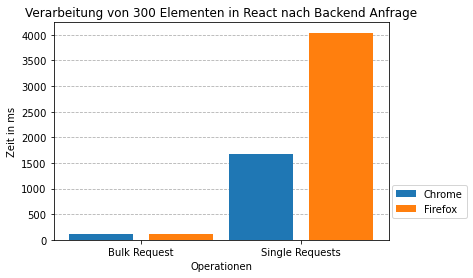

In [6]:
events = ['Bulk Request', 'Single Requests']
x_axis = np.arange(len(events))

c_val = [
    c_sum['time']['mean']['domManipulation_BULK_REQUEST'],
    c_sum['time']['mean']['domManipulation_SINGLE_REQUESTS']
]
    
f_val = [
    f_sum['time']['mean']['domManipulation_BULK_REQUEST'],
    f_sum['time']['mean']['domManipulation_SINGLE_REQUESTS']
]

plt.bar(x_axis - 0.25, c_val, width=0.4, label='Chrome', zorder=10)
plt.bar(x_axis + 0.25, f_val, width=0.4, label='Firefox', zorder=10)

plt.grid(axis='y', linestyle='dashed', zorder=0)
plt.title(f"Verarbeitung von {size} {'Elementen' if size != 1 else 'Element'} in {app} nach Backend Anfrage")
plt.xticks(x_axis, events, rotation=0)
plt.ylabel("Zeit in ms")
plt.xlabel("Operationen")
plt.legend(loc=[1.01, 0.1])

plt.savefig(f"./charts/plot_{app}_{size}.png", bbox_inches="tight", transparent=True)